In [3]:
import copy
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from matplotlib.colors import LogNorm, Normalize
from IPython.display import clear_output
# settings
# plt.style.use("fivethirtyeight")

try:
    import PyBlastAfterglowMag as PBA
except:
    raise ImportError("Cannot import PyBlastAfterglowMag")
try:
    import afterglowpy as grb
except:
    afterglowpy = False
    print("Error! could not import afteglowpy")

from grbafg.tools import *
from settings import SettingsGaussian

curdir = os.getcwd() + '/'

figs = os.getcwd()+"/figs/"
out = os.getcwd()+"/out/"
pdfs = "/home/vsevolod/Work/GIT/overleaf/grb_model_paper/figs/"

In [4]:
cases = CasesFSRS(default_parfile_fpath=curdir+"parfile_def.par",
                  workingdir=curdir+"output_rs/")

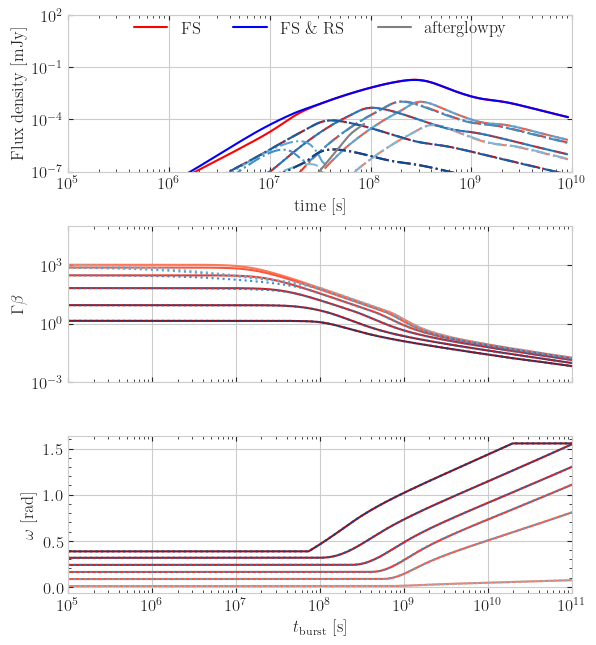

In [13]:
def paper_plot_compare_fsrs():
    
    
    
    tsk = SettingsGaussian()
    tsk.pars_fsrs["n_ism"] = 1e-4
    tsk.pars_fsrs["theta_obs"] = 0.9

    fig, axes = plt.subplots(figsize=(6,6.5), ncols=1, nrows=3)
    cases.paper_plot_compare_fsrs(axes, 
                                  struct=tsk.structure, 
                                  pars=tsk.pars_fsrs,
                                  opts=tsk.opts_a_fsrs,
                                  opts_grb=tsk.opts_a_fsrs,
                                  layers=(0,10,20,30,40,49))
    clear_output(wait=False)

    # plot
    ax = axes[0]
    # ax.grid()
    ax.legend(fancybox=True, loc='upper center',
              # bbox_to_anchor=(0.5, 0.5),  # loc=(0.0, 0.6),  # (1.0, 0.3), # <-> |
              shadow=False, ncol=3, fontsize=12,
              framealpha=0., borderaxespad=0.)
    ax.set_xscale("log")
    ax.set_yscale("log")
    ax.set_xlabel("time [s]", fontsize=12)
    ax.set_ylabel("Flux density [mJy]", fontsize=12)
    # ax.set_title(title)
    ax.set_xlim(1e5,1e10)
    ax.set_ylim(1e-7,1e2)
    # ax.grid()
    ax.minorticks_on()
    ax.tick_params(axis='both', which='both', labelleft=True,
                   labelright=False, tick1On=True, tick2On=True,
                   labelsize=12,
                   direction='in',
                   bottom=True, top=True, left=True, right=True)
    # ax.set_facecolor("pink")

    ax = axes[1]
    # ax.grid()
    # ax.legend()
    ax.set_xscale("log")
    ax.set_yscale("log")
    ax.set_ylabel(r"$\Gamma\beta$", fontsize=12)
    ax.set_xlim(1e5,1e11)
    ax.set_ylim(1e-3,1e5)
    ax.tick_params(axis='both', which='both', labelleft=True,
                   labelright=False, tick1On=True, tick2On=True,
                   labelsize=12,
                   direction='in',
                   bottom=True, top=True, left=True, right=True)
    ax.xaxis.set_tick_params(labelbottom=False)
    ax.minorticks_on()
    # ax.set_facecolor("pink")

    ax = axes[2]
    # ax.grid()
    # ax.legend()
    ax.set_xscale("log")
    ax.set_yscale("linear")
    ax.set_ylabel(r"$\omega$ [rad]", fontsize=12)
    ax.set_xlabel(r"$t_{\rm burst}$ [s]", fontsize=12)
    ax.set_xlim(1e5,1e11)
    ax.tick_params(axis='both', which='both', labelleft=True,
                   labelright=False, tick1On=True, tick2On=True,
                   labelsize=12,
                   direction='in',
                   bottom=True, top=True, left=True, right=True)
    ax.minorticks_on()
    # ax.set_facecolor("pink")

    plt.tight_layout()
    # print("Saving:\n {}".format(paperfigdir+"abstract_spread_lcs_dyn.pdf"))
    # plt.savefig(paperfigdir+"abstract_spread_lcs_dyn.pdf")
    # plt.savefig(paperfigdir+"abstract_gaus_spread_lcs_dyn.png", dpi=256)
    # plt.show()
    figname = "abstract_tophat_fsrs_lcs_dyn"
    plt.savefig(pdfs+figname+".pdf")
    plt.savefig(pdfs+figname+".png", dpi=256)
    plt.show()
paper_plot_compare_fsrs()